In [2]:
import numpy as np 
from scipy.integrate import odeint
import os, sys, warnings
from pathlib import Path
from os.path import dirname, realpath
script_dir = Path(dirname(realpath('.')))
module_dir = str(script_dir)
sys.path.insert(0, module_dir + '/modules')
import utility as ut
import surrogate1 as sr1
import surrogate as sr
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
warnings.filterwarnings('ignore')

In [4]:
save_folder = '../data/L63-Strategy-varying-featuresize/'
D, D_r1, D_r2 = 3, 2048, 4096
Lyapunov_time, dt = 1./.91, 0.02
error_threshold = 0.05
beta = 4e-5
w_max, b_max = 0.4, 4.0
sqrt_n_models = 30
n_repeats = 100

L63_data_folder = '../data/L63-trajectories'
train = np.load('{}/train.npy'.format(L63_data_folder))
validation = np.load('{}/validation.npy'.format(L63_data_folder))

bsa1 = sr1.BatchStrategyAnalyzer_SMLR(save_folder + str(D_r1))
bsa2 = sr1.BatchStrategyAnalyzer_SMLR(save_folder + str(D_r2))
data1 = bsa1.get_data()
data2 = bsa2.get_data()

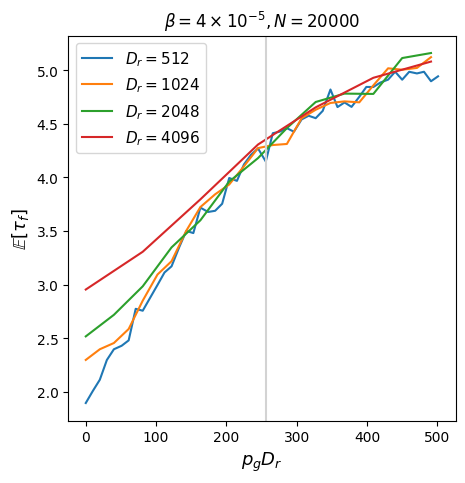

In [5]:
fig = plt.figure(figsize=(5, 5))
# ax = fig.add_subplot(121)
ax1 = fig.add_subplot(111)

# tau1 = data1[data1['good_rows_W_in']==1]['tau_f_se']
# tau2 = data2[data2['good_rows_W_in']==0.5]['tau_f_se']
# sns.histplot(tau1, ax=ax, label=fr'$D_r=${D_r1}, $p_g=1$', stat='probability')
# sns.histplot(tau2, ax=ax, label=fr'$D_r=${D_r2}, $p_g=0.5$', stat='probability')
# ax.legend(fontsize=11)
# ax.set_xlabel(r'$\tau_f$', fontsize=13)
# ax.set_ylabel(r'Probability', fontsize=11)

for D_r in [512, 1024, D_r1, D_r2]:
    bsa = sr1.BatchStrategyAnalyzer_SMLR(save_folder + str(D_r))
    data = bsa.get_data()
    tau = bsa.get_line('tau_f_se')[0]
    p_g = np.unique(data['good_rows_W_in'].to_numpy())
    i = np.where(D_r*p_g > 511)[0][0]#np.where(tau > 5)[0][0]
    ax1.plot(D_r*p_g[:i], tau[:i], label=fr'$D_r=${D_r}')
ax1.axvline(x=256, c='lightgrey')  
ax1.legend(fontsize=11)
ax1.set_xlabel(r'$p_gD_r$', fontsize=13)
ax1.set_ylabel(r'$\mathbb{E}[\tau_f]$', fontsize=13)
ax1.set_title(r'$\beta=4\times10^{-5}, N=20000$')
plt.savefig('../data/plots/effective-D_r.png', dpi=300, bbox_inches='tight')
plt.show()

In [39]:
np.argmax(tau>5)

50

In [36]:
tau1

25000     8.2082
25001     6.8250
25002     4.3316
25003     5.2598
25004     4.9322
          ...   
25495     5.4236
25496    10.6834
25497     5.5146
25498     4.4772
25499     5.0050
Name: tau_f_se, Length: 500, dtype: float64

In [7]:
a = np.random.normal(size=(3, 4))

In [8]:
np.max(a, axis=0)

array([1.31499504, 0.76173535, 0.47030204, 0.90590369])